# Linear Regression 구현하기


## Linear Regression(선형회귀)란?
* 데이터들의 1차 함수(직선) 상관관계를 모델링
* 데이터들을 대표할 수 있는 직선 찾기

## 학습 목표 및 방법
* 데이터들을 통해 $y = xW + b$의 $W$와 $b$를 찾는 것이 목표
* Optimizer : Gradient Descent
* Loss Function : MSE (Mean Squared Error)


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [ ]:
# 학습을 통해 구하기를 기대하는 값은 Variable로 선언합니다.
W = tf.Variable(tf.random_normal(shape=[1], name='w'))
b = tf.Variable(tf.random_normal(shape=[1], name='b'))

# placeholder는 학습을 위해 입력하는 데이터가 들어갈 자리입니다.
x = tf.placeholder(tf.float32)

In [ ]:
# 1차함수를 통해 예측치를 도출
pred_y = W * x + b

In [ ]:
# y도 정답으로 학습시에 넣어주는 값이므로 placeholder로 선언합니다.
y = tf.placeholder(tf.float32)

In [ ]:
# 손실함수를 정의합니다.
# MSE (Mean Squared Error)를 손실함수로 설정하였습니다.
# 예측한 값들과 실제 값들의 각각의 차를 제곱한 후, 평균을 낸 값을 손실로 정합니다.
# 손실값을 줄이는 방향으로 학습을 진행하게 됩니다.
loss = tf.reduce_mean(tf.square(pred_y - y))

In [ ]:
# 최적화를 정의합니다.
# 최적화를 경사하강법을 사용하고 학습율(learning rate)은 0.01로 설정했습니다.
optimizer = tf.train.GradientDescentOptimizer(0.01) 
# 최적화가 손실값을 최소화하는 방향으로 학습하도록 설정했습니다.
train_step = optimizer.minimize(loss)

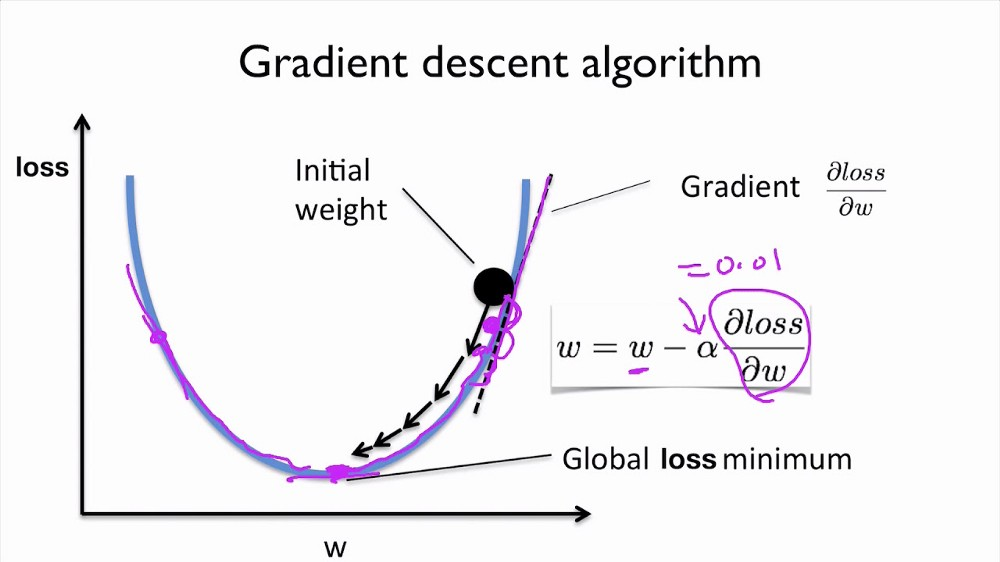

이제 입력데이터와 이에 대응하는 정답데이터를 준비하도록 합니다.

In [ ]:
# y = 2x + 1 우리가 학습을 통해 찾으려고 하는 1차 함수
# 이에 해당하는 학습데이터를 만들어줍니다.
x_train = [1, 2, 3, 4, 5, 6]
y_train = [3, 5, 7, 9, 11, 13]


세션을 통해 학습을 진행하고 2와 1의 근사값을 구하는지 확인해봅니다.

In [ ]:
sess = tf.Session()
# 파라미터(W,b)를 normal distribution에서 추출한 임의의 값으로 초기화
result = sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(1000): # 경사하강법 1000번 수행
  # feed_dict에는 placeholder 변수를 키, 전달할 데이터 리스트를 값으로 지정합니다.
  sess.run(train_step, feed_dict={x:x_train, y:y_train}) 

In [ ]:
print("학습을 통해 도출된 값")
print("W: {}, b: {}".format(sess.run(W), sess.run(b)))

학습을 통해 도출된 값
W: [2.0030632], b: [0.98688686]


우리는 귀납적으로 오차가 적은 곳으로 답에 최대한 가까운 값을 찾아들어간 것이지 해를 구하는 것이 아닙니다.
우리가 상정했던 2, 1의 근사값을 성공적으로 찾아낸 것을 알 수 있습니다.

이제 새로운 테스트 데이터로 모델을 테스트해봅시다.

In [ ]:
x_test = [3, 5, 5, 6]

# 정답은 7, 11, 11, 13 
print(sess.run(pred_y, feed_dict={x: x_test}))

[ 6.9960766 11.002203  11.002203  13.005266 ]
